In [1]:
import RIIM_tools

In [2]:
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
import numpy as np
from qiskit.providers.aer import noise
import random
provider = IBMQ.load_account()
from qiskit.providers.aer.noise import NoiseModel

import matplotlib.pyplot as plt

/Users/bpnachman/opt/anaconda3/envs/Qiskit/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
shots=10000
error_param = 0.1

In [4]:
#Setting up a quantum circuit to test
qc = QuantumCircuit(2, 2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.cx(1, 0)
qc.measure(0,0)
qc.measure(1,1)
qc.count_ops()
print(qc)

qc3x,rvals = RIIM_tools.fiim_generate_circs(1,qc)
print(qc3x[1])

          ┌───┐     ┌───┐┌─┐   
q_0: ──■──┤ X ├──■──┤ X ├┤M├───
     ┌─┴─┐└─┬─┘┌─┴─┐└─┬─┘└╥┘┌─┐
q_1: ┤ X ├──■──┤ X ├──■───╫─┤M├
     └───┘     └───┘      ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1 
                    ┌───┐┌───┐┌───┐               ┌───┐┌───┐┌───┐┌─┐   
q_0: ──■────■────■──┤ X ├┤ X ├┤ X ├──■────■────■──┤ X ├┤ X ├┤ X ├┤M├───
     ┌─┴─┐┌─┴─┐┌─┴─┐└─┬─┘└─┬─┘└─┬─┘┌─┴─┐┌─┴─┐┌─┴─┐└─┬─┘└─┬─┘└─┬─┘└╥┘┌─┐
q_1: ┤ X ├┤ X ├┤ X ├──■────■────■──┤ X ├┤ X ├┤ X ├──■────■────■───╫─┤M├
     └───┘└───┘└───┘               └───┘└───┘└───┘                ║ └╥┘
c: 2/═════════════════════════════════════════════════════════════╩══╩═
                                                                  0  1 


In [5]:
backend_qasm = Aer.get_backend('qasm_simulator')
provider = IBMQ.get_provider(group='open')
device = provider.get_backend('ibmq_ourense')

### Pull IBMQ device properties 
full_properties = device.properties()
coupling_map = device.configuration().coupling_map
depol_noise_model = RIIM_tools.generate_cx_error_noise_model(2, error_param)

In [6]:
vals_nominal = execute(qc,
        backend_qasm,
        shots=shots,
        noise_model=depol_noise_model,
        coupling_map = coupling_map,
        optimization_level=0).result().get_counts()

In [8]:
vals_nominal

{'00': 7393, '01': 885, '10': 857, '11': 865}

In [9]:
vals_3x = execute(qc3x[1],
        backend_qasm,
        shots=shots,
        noise_model=depol_noise_model,
        coupling_map = coupling_map,
        optimization_level=0).result().get_counts()

In [10]:
vals_3x

{'00': 4566, '01': 1800, '10': 1808, '11': 1826}

In [11]:
array_nom = np.array([vals_nominal['00'],vals_nominal['01'],vals_nominal['10'],vals_nominal['11']])
array_3x = np.array([vals_3x['00'],vals_3x['01'],vals_3x['10'],vals_3x['11']])

Text(0, 0.5, 'counts')

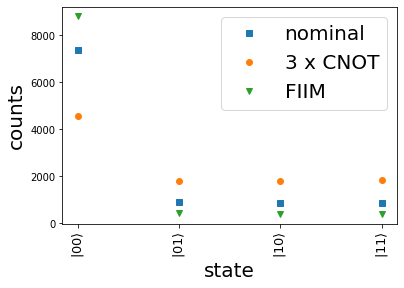

In [12]:
plt.plot(array_nom,marker='s',ls='',label="nominal")
plt.plot(array_3x,marker='o',ls='',label="3 x CNOT")
plt.plot(1.5*array_nom-0.5*array_3x,marker='v',ls='',label="FIIM")

plt.legend(fontsize=20)

plt.xticks([0,1,2,3],[r'$|00\rangle$',r'$|01\rangle$',r'$|10\rangle$',r'$|11\rangle$'],rotation='vertical',fontsize=13)
plt.xlabel("state",fontsize=20)
plt.ylabel("counts",fontsize=20)